In [83]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Загрузка датасета

Загружаем датасет **iris**

In [84]:
iris = load_iris()

target_names = iris.target_names

df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [85]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Характеристики датасета

In [86]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Проверяем наличие отсутствующих значений

In [87]:
df.isnull().values.any()

False

Матрица корреляции

<Axes: >

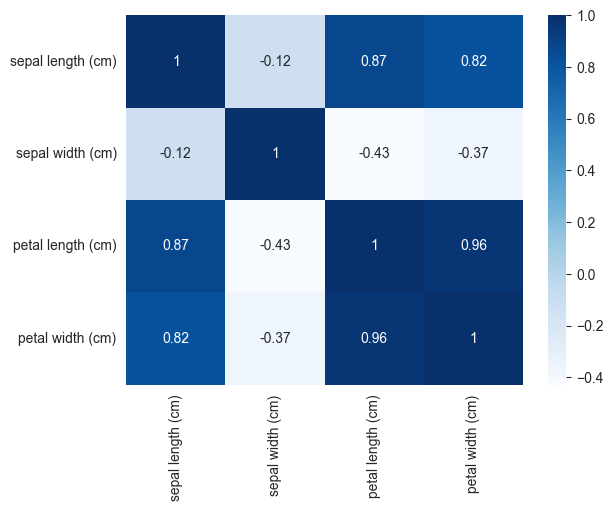

In [88]:
sns.heatmap(df.corr(), cmap="Blues", annot=True)

Разделяем датасет на тренировочную и тестовую выборки

In [89]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3, random_state = 0)

# Задача 1

Исследовать качество работы классификатора в зависимости от выбранного метода преобразования данных.

Изучить методы преобразования данных: from sklearn.preprocessing https://scikit-learn.org/stable/modules/preprocessing.html.

Критерий качества - accuracy.

Сформировать таблицу для сравнения.

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn import preprocessing

### Используемые методы преобразования данных

1. Без преобразования данных
2. StandardScaler - вычитает из каждого из признаков среднее и делит на дисперсию
3. MinMaxScaler - масштабирует каждый из признаков в заданный диапазон (по умолчанию [0; 1])
4. MaxAbsScaler - масштабирует каждый из признаков по максимальному по модулю значению
5. QuantileTransformer - приводит данные к равномерному распределению
6. PowerTransformer - приводит данные к нормальному распределению
7. Normalizer - нормализует данные 
8. Binarizer - приводит каждый из признаков к бинарному виду (устанавливает значение 0 или 1 в зависимости от того, больше или нет значение заданного порога)

In [91]:
Preprocessings = {
    "None": None,
    "StandardScaler": preprocessing.StandardScaler(),
    "RobustScaler": preprocessing.RobustScaler(),
    "MinMaxScaler": preprocessing.MinMaxScaler(),
    "MaxAbsScaler": preprocessing.MaxAbsScaler(),
    "QuantileTransformer": preprocessing.QuantileTransformer(random_state=0),
    "PowerTransformer": preprocessing.PowerTransformer(),
    "Normalizer": preprocessing.Normalizer(),
    "Binarizer": preprocessing.Binarizer()
}

Accuracies = {}

In [92]:
for preprocessing in Preprocessings.items():
    transformer = preprocessing[1]

    if transformer is not None:
        transformed_X_train = transformer.fit_transform(X_train)
        transformed_X_test = transformer.transform(X_test)
    else:
        transformed_X_train = X_train
        transformed_X_test = X_test

    classifier = KNeighborsClassifier(n_neighbors=1)

    classifier.fit(transformed_X_train, y_train)
    y_pred = classifier.predict(transformed_X_test)

    Accuracies[preprocessing[0]] = accuracy_score(y_test, y_pred)

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (105). n_quantiles is set to n_samples.
  warnings.warn(


### Таблица с результатами

In [93]:
Accuracies_DF = pd.DataFrame(Accuracies.items(), columns=['Method', 'Accuracy'])

Accuracies_DF

,Method,Accuracy
0,None,0.977778
1,StandardScaler,0.933333
2,RobustScaler,0.911111
3,MinMaxScaler,0.977778
4,MaxAbsScaler,0.977778
5,QuantileTransformer,0.977778
6,PowerTransformer,0.933333
7,Normalizer,0.977778
8,Binarizer,0.400000


### График с результатами

<Axes: xlabel='Accuracy', ylabel='Method'>

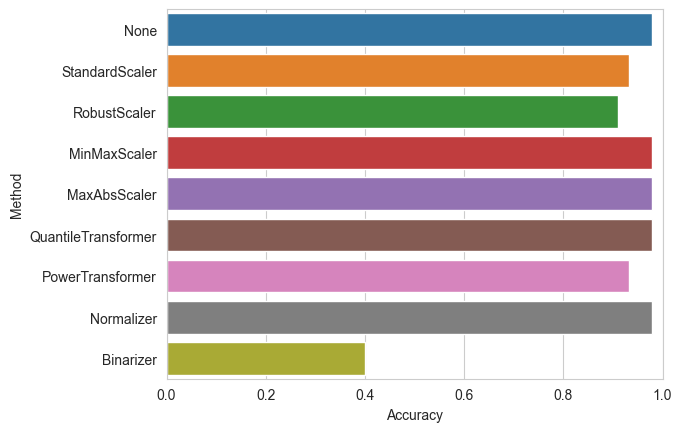

In [94]:
sns.set_style('whitegrid')

plot = sns.barplot(Accuracies_DF, x='Accuracy', y='Method', orient='h', hue='Method')
plot.set_xlim(0, 1)

plot